# Operaciones básicas sobre texto

* *30 min* | Última modificación: Sept 22, 2020

In [1]:
##
## Preparacion de los datos
## 
import pandas as pd

data = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/scopus-abstracts.csv",
    sep=",",
    thousands=None,
    decimal=".",
    encoding="utf-8",
)
data.columns

Index(['DOI', 'Link', 'Abstract'], dtype='object')

In [2]:
##
## Numero de registros
##
len(data)

1902

In [3]:
#
# Ejemplo de un abstract
#
data.Abstract[0]

'Mobility is one of the fundamental requirements of human life with significant societal impacts including productivity, economy, social wellbeing, adaptation to a changing climate, and so on. Although human movements follow specific patterns during normal periods, there are limited studies on how such patterns change due to extreme events. To quantify the impacts of an extreme event to human movements, we introduce the concept of mobility resilience which is defined as the ability of a mobility system to manage shocks and return to a steady state in response to an extreme event. We present a method to detect extreme events from geo-located movement data and to measure mobility resilience and transient loss of resilience due to those events. Applying this method, we measure resilience metrics from geo-located social media data for multiple types of disasters occurred all over the world. Quantifying mobility resilience may help us to assess the higher-order socio-economic impacts of ext

In [4]:
##
## Algunos abstracts tienen la marca de copyright + año + 'The Author(s).'
## Se remueve
##
data['Abstract'] = data.Abstract.map(lambda w: w[0: w.find("\u00a9")], na_action='ignore')
data.Abstract[0]

'Mobility is one of the fundamental requirements of human life with significant societal impacts including productivity, economy, social wellbeing, adaptation to a changing climate, and so on. Although human movements follow specific patterns during normal periods, there are limited studies on how such patterns change due to extreme events. To quantify the impacts of an extreme event to human movements, we introduce the concept of mobility resilience which is defined as the ability of a mobility system to manage shocks and return to a steady state in response to an extreme event. We present a method to detect extreme events from geo-located movement data and to measure mobility resilience and transient loss of resilience due to those events. Applying this method, we measure resilience metrics from geo-located social media data for multiple types of disasters occurred all over the world. Quantifying mobility resilience may help us to assess the higher-order socio-economic impacts of ext

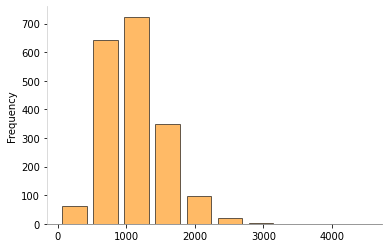

In [5]:
##
## Longitud de los abstracts en caracteres
##  colores diponibles en matplotlib: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
##
import matplotlib.pyplot as plt

data.Abstract.map(lambda w: len(w), na_action="ignore").plot.hist(
    color="darkorange", alpha=0.6, rwidth=0.8, edgecolor="k"
)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

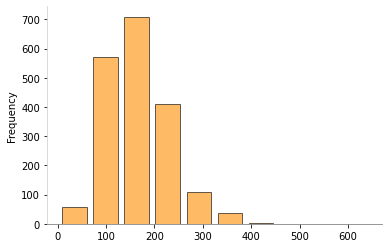

In [6]:
##
## Longitud de los abstracts en palabras
##
data.Abstract.map(lambda w: len(w.split()), na_action="ignore").plot.hist(
    color="darkorange", alpha=0.6, rwidth=0.8, edgecolor="k"
)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

In [7]:
##
## Palabras mas frecuentes
##
words = data.Abstract.copy()
words = words.dropna()
words = words.tolist()

# Se obtiene una lista de strings
words[0]

'Mobility is one of the fundamental requirements of human life with significant societal impacts including productivity, economy, social wellbeing, adaptation to a changing climate, and so on. Although human movements follow specific patterns during normal periods, there are limited studies on how such patterns change due to extreme events. To quantify the impacts of an extreme event to human movements, we introduce the concept of mobility resilience which is defined as the ability of a mobility system to manage shocks and return to a steady state in response to an extreme event. We present a method to detect extreme events from geo-located movement data and to measure mobility resilience and transient loss of resilience due to those events. Applying this method, we measure resilience metrics from geo-located social media data for multiple types of disasters occurred all over the world. Quantifying mobility resilience may help us to assess the higher-order socio-economic impacts of ext

In [8]:
data.Abstract[data.Abstract.map(lambda w: 'mobility' in w.lower(), na_action='ignore')]

0       Mobility is one of the fundamental requirement...
10      The tendency of people to form socially cohesi...
54      In recent years, mobility data from smart card...
95      The influence of urban design on economic vita...
111     This study demonstrates the use of mobile phon...
188     Customer profiles that include gender and age ...
209     To measure job accessibility, person-based app...
235     In this research, we exploit repeated parts in...
236     Tourist flows in historical cities are continu...
239     It is well reported that long commutes have a ...
242     Nowadays, Location-Based Social Networks (LBSN...
244     In the last decades, the notion that cities ar...
251     In Latin America, shopping malls seem to offer...
253     Traditional crime prediction models based on c...
255     Human mobility always had a great influence on...
257     In this paper, we follow the short-ranged Syri...
262     Epidemic outbreaks are an important healthcare...
263     Billio

In [9]:
##
## word tokenizer
##
from nltk.tokenize import word_tokenize

tokens = data.Abstract.map(word_tokenize)

# primeros 10 tokens del primer abstract
tokens[0][:10]

['Mobility',
 'is',
 'one',
 'of',
 'the',
 'fundamental',
 'requirements',
 'of',
 'human',
 'life']

In [10]:
##
## Collocations
##
import nltk 

# texto original
data.Abstract[0]

'Mobility is one of the fundamental requirements of human life with significant societal impacts including productivity, economy, social wellbeing, adaptation to a changing climate, and so on. Although human movements follow specific patterns during normal periods, there are limited studies on how such patterns change due to extreme events. To quantify the impacts of an extreme event to human movements, we introduce the concept of mobility resilience which is defined as the ability of a mobility system to manage shocks and return to a steady state in response to an extreme event. We present a method to detect extreme events from geo-located movement data and to measure mobility resilience and transient loss of resilience due to those events. Applying this method, we measure resilience metrics from geo-located social media data for multiple types of disasters occurred all over the world. Quantifying mobility resilience may help us to assess the higher-order socio-economic impacts of ext

In [11]:
## textos que tienden a aparecer juntos 
nltk.Text(tokens[0]).collocations()

extreme events; human movements; mobility resilience; extreme event


In [12]:
#
# Se convierte todo el texto en un unico string
#
words = ' '.join(words)
words[:300]

'Mobility is one of the fundamental requirements of human life with significant societal impacts including productivity, economy, social wellbeing, adaptation to a changing climate, and so on. Although human movements follow specific patterns during normal periods, there are limited studies on how su'

In [13]:
##
## Se separa por palabras
## ---> lista de palabras
##
words = words.split()
words[:6]

['Mobility', 'is', 'one', 'of', 'the', 'fundamental']

In [14]:
##
## Se remueven todas las palabras que no esten
## compuestas por letras
## 
import re

words = [re.sub(r'[^A-Za-z]', '', w) for w in words]
words = [w for w in words if w != '']
words[:6]

['Mobility', 'is', 'one', 'of', 'the', 'fundamental']

In [15]:
##
## Se transforman las palabras minusculas
##
words = [w.lower() for w in words]
words[:6]

['mobility', 'is', 'one', 'of', 'the', 'fundamental']

In [16]:
##
## Busqueda de una palabra
##
data.Abstract.map(lambda w: 'mobility' in w.lower())

0        True
1       False
2       False
3       False
4       False
        ...  
1897    False
1898    False
1899    False
1900    False
1901    False
Name: Abstract, Length: 1902, dtype: bool

In [17]:
##
## Conteo de palabras
##   Ver https://docs.python.org/3/library/collections.html
##
from collections import Counter

counter = Counter(words)
counter.most_common(10)

[('the', 19384),
 ('of', 12890),
 ('and', 10804),
 ('to', 8064),
 ('a', 6694),
 ('in', 6626),
 ('data', 4942),
 ('is', 4126),
 ('for', 3758),
 ('that', 3016)]

In [18]:
##
## Se removen los stopwords
##    pip3 install nltk
##    nltk.download('stopwords')
##
import nltk

STOPWORDS = nltk.corpus.stopwords.words('english')

words = [w for w in words if w not in STOPWORDS]
counter = Counter(words)
counter.most_common(10)

[('data', 4942),
 ('paper', 1037),
 ('model', 946),
 ('using', 920),
 ('information', 907),
 ('research', 831),
 ('results', 827),
 ('analysis', 806),
 ('used', 730),
 ('based', 726)]